## ML Steps
1. Define Business Case/problem statement
2. Import basic libraries --> numpy, pandas, seaborn, warnings
3. Load data
4. Domain Analysis
5. Basic checks --> shape, tail, info, dtype, describe, unique, value count
6. Exploratory Data Analysis (EDA)
* Univariate analysis --> histogram, count, boxplot
* Bivariate --> scatter, lines, box, barplot
* Multivariate --> pairplotS

## 1. Problem statement
Use relevant machine learning steps to predict total sales using features like money spent on Advertising/Marketing individual fields. The analysis is based on [Advertising Dataset](https://github.com/EngNormie/Datasets/blob/main/Advertising.csv). You can also download the dataset from [Kaggle](https://www.kaggle.com/datasets/technormie/advertising-and-sales) 

## 2. Import basic libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 3. Load dataset

In [7]:
data = pd.read_csv("Advertising.csv")

In [8]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
# drop the unnamed column
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## 4. Domain Analysis
Based on the problem:
* Sales is target
* TV, Radio and Newspaper are input variables
* This data basically tells us about the total sales made by the company by investing certain amount on TV, Radio and Newspaper Advertising.

## 5. Basic checks

In [10]:
# shape
data.shape

(200, 4)

In [11]:
# print all columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
# dtypes
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
# head
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
# tail
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [15]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
# describe --> gives statistical summary
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Insights
* Average sales made by the company is $14.02m
* Average amount spent on TV is more compared to Radio and Newspaper
* Maximum amount spent on TV advertising is more compared to Radio and Newspaper

In [17]:
# check for missing information
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 6. Exploratory Data Analysis (EDA)

### Univariate analysis
* Analyzing single variable/column/feature
* Check the distribution of each column

<AxesSubplot:ylabel='Density'>

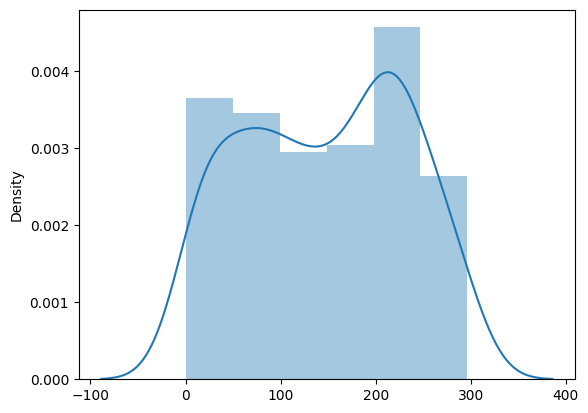

In [18]:
# Check the distribution of TV
sns.distplot(x=data.TV,kde=True) # -->  function still works without 'kde=True'. However a histogram needs it to sisplay curve

<AxesSubplot:ylabel='Density'>

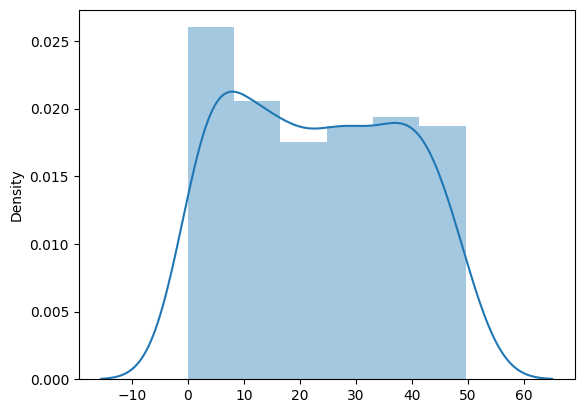

In [19]:
# Check the distribution of Radio
sns.distplot(x=data.Radio,kde=True)

<AxesSubplot:ylabel='Density'>

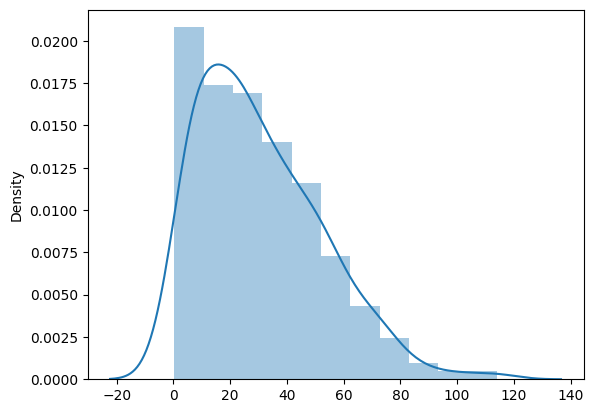

In [20]:
# Check the distribution of Newspaper
sns.distplot(x=data.Newspaper,kde=True)

<AxesSubplot:ylabel='Density'>

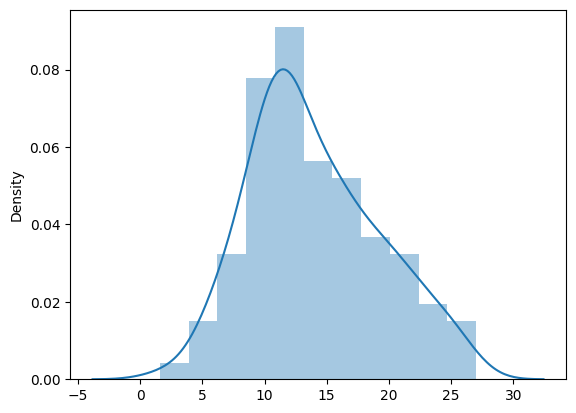

In [21]:
# Check the distribution of Sales
sns.distplot(x=data.Sales,kde=True)

In [ ]:
# Insights
* Sales is representing normal distribution.
* TV, Radio and Newspaper are representing skewness/not normal

### Bivariate analysis
Analyzing multiple variables

<AxesSubplot:xlabel='TV', ylabel='Sales'>

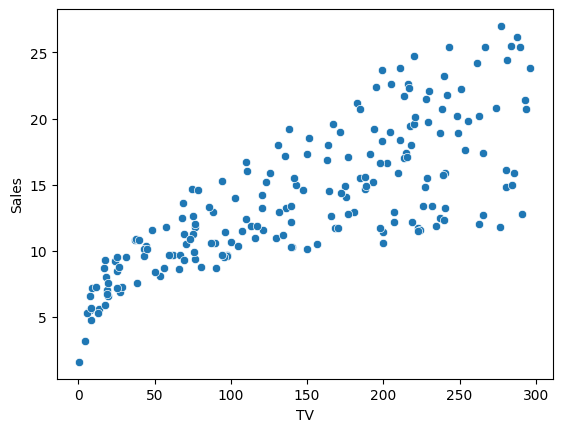

In [27]:
# Analyze how TV impacts Sales
sns.scatterplot(data=data,x='TV',y='Sales')

#### Insights
* As we increase the amount of money on TV advertising, sales increase
* There is high correlation between TV and Sales
* The more we invest in TV the higher the sales
* There is a positive relationship btwn TV and Sales

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

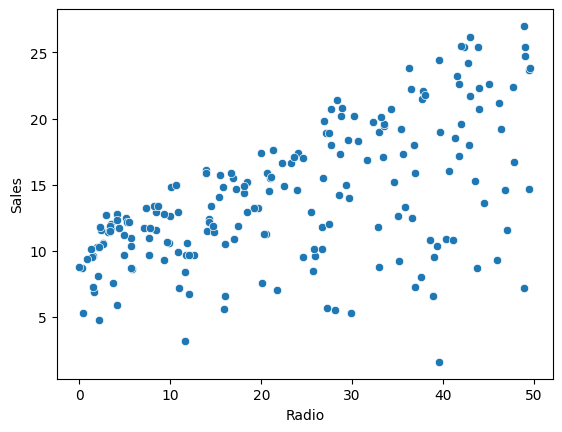

In [25]:
# Analyze how amount spent on Radio impact Sales
sns.scatterplot(data=data,x='Radio',y='Sales')

#### Insights
* There is no much trend or strong relationship btwn Radio and Sales
* Investing in Radio advertising will have less impact on Sales
* We can see that high investment in Radio advertising sometimes gives low sales and sometimes high sales

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

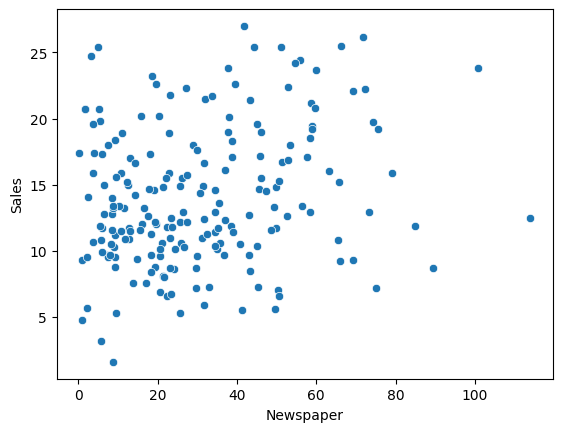

In [28]:
# Analyze how amount spent on Newspaper impact sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')

#### Insights
* There is no relationship btwn Newspaper and Sales
* Investing more or less on Newspaper advertising will yield very less Sales

#### Overall insights
* TV is the best field for advertising the product so that the company can yield more sales.
* Investing in Radio will also yield some good sales but investing in Newspaper is not really a good idea.

### Multivariate analysis

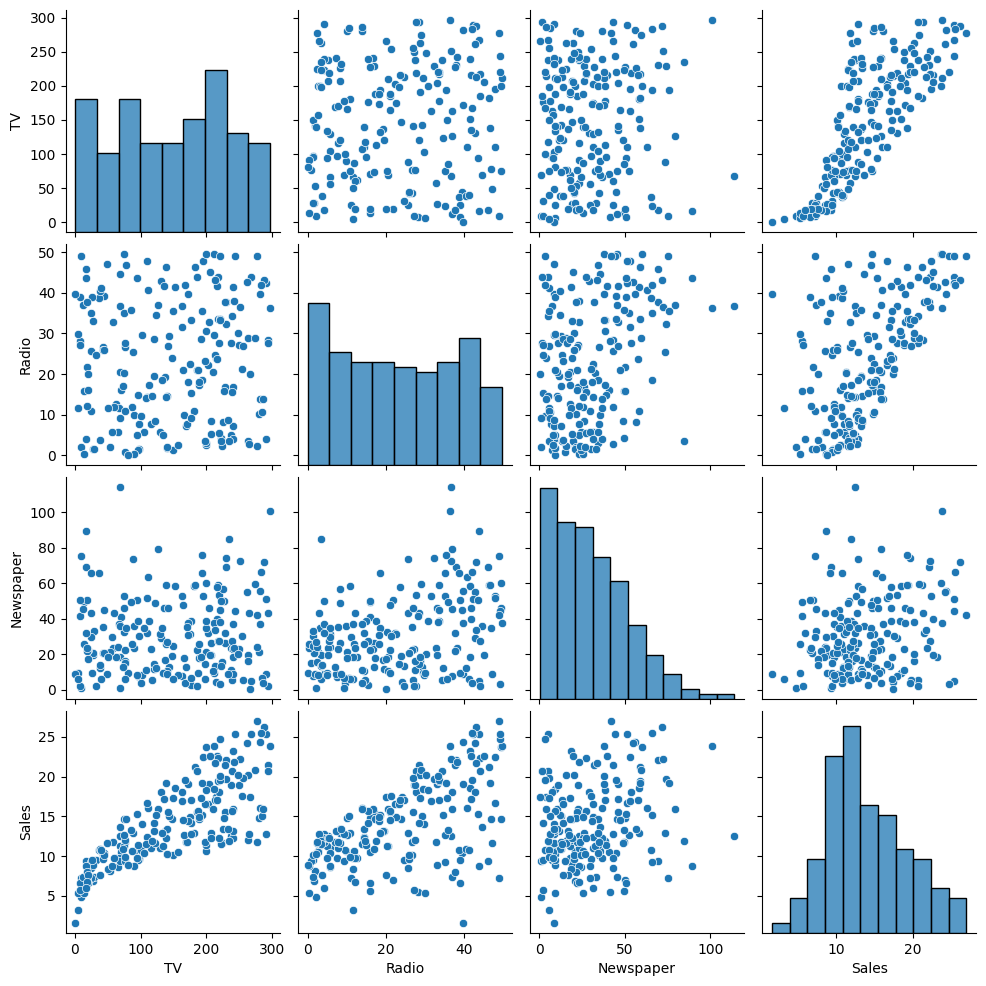

In [29]:
# pairplot
sns.pairplot(data)

In [32]:
# skewness
data.Sales.skew()

0.4075714250767127

## Data Preprocessing/ Data Cleaning

### check for missing values and handle them
* If any missing values, u've to replace them

In [35]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Check for duplicates
Repetitive values, if found, replace them

In [36]:
data.duplicated().sum()

0

In [38]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

### Check for outliers

<AxesSubplot:xlabel='TV'>

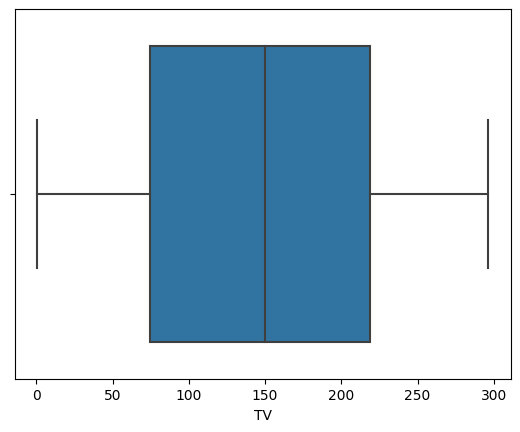

In [39]:
# check outliers in TV
sns.boxplot(x=data.TV)

<AxesSubplot:xlabel='Radio'>

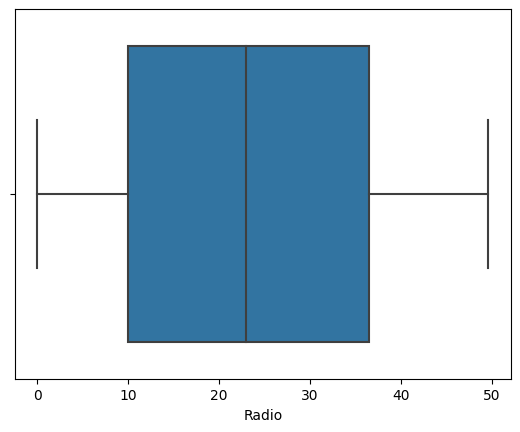

In [40]:
# check outliers in Radio
sns.boxplot(x=data.Radio)

<AxesSubplot:xlabel='Newspaper'>

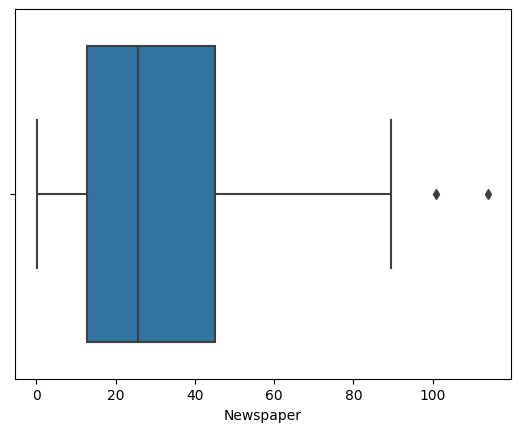

In [41]:
# check outliers in Newspaper
sns.boxplot(x=data.Newspaper)

<AxesSubplot:xlabel='Sales'>

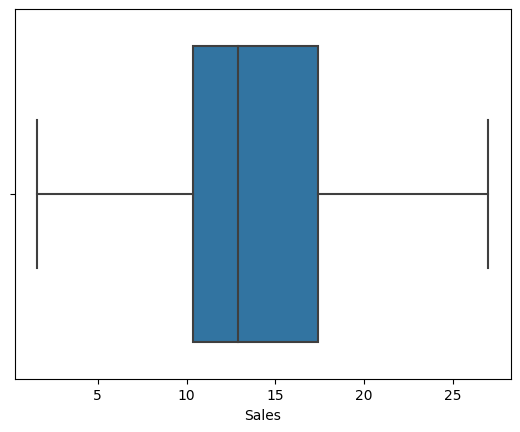

In [42]:
# check outliers in Sales
sns.boxplot(x=data.Sales)

* We can see there are outliers in Newspaper column
* Outliers in Newspaper are towards the right

### Methods to find outliers
* IQR Method: used when data is not normal. Uses Lowwer Limit and Upper Limit

IQR = Q3 - Q1

Lower Limit = Q1-1.5*IQR

Upper Limit = Q3+1.5*IQR

The values < LL and values > UL are called outliers


* 3-sigma Rule: used when data is normal

Lower Limit = mew - 3sigma

Upper Limit = mew + 3sigma

Value not elements of (mew-3sigma, mew+3sigma)

Note:

Handle outliers (replace) only if data has less than 5% outliers

If outliers above 5% don't do anything coz those outliers have impact on your data

### Task
* Find Q1, Q3 of Newspaper
* Find LL, and UL
* Write a condition to find values less than LL and greater than UL (filtering data)

In [6]:
# Find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Newspaper'].quantile(0.75)
print("upper quartile",Q3)

lower quartile 12.75
upper quartile 45.1


In [7]:
# Find IQR
IQR = Q3 - Q1
IQR

32.35

In [8]:
# FInd lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
print("lower limit is", lower_limit)

upper_limit = Q3 + 1.5*IQR
print("upper_limit is", upper_limit)

lower limit is -35.775000000000006
upper_limit is 93.625


In [9]:
# Find values above upper_limit
data.loc[data['Newspaper']>upper_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [50]:
# Find values below lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [52]:
# Find % of outliers (records above upper limit and below lower limit)
len(data.loc[data['Newspaper']>upper_limit])/len(data) # we've no values below lower limit

0.01

In [53]:
# How to handle outliers
# since data is not normal, we'll replace outliers with median
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

<AxesSubplot:xlabel='Newspaper'>

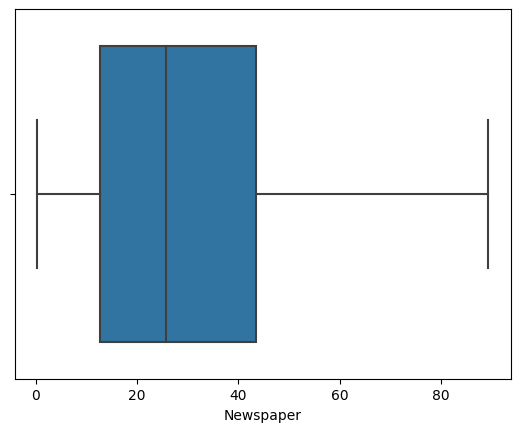

In [54]:
# Check if there are still any outliers in Newspaper
sns.boxplot(x=data.Newspaper)

In [55]:
# Skipping scaling

In [56]:
# Skipping converting categorical data into numerical data

## Feature Engineering

#### drop irrelevant columns
#### selecting best features
#### we find correlation 
* Drop the columns which has very less correlation with target values
* Drop one of the columns if two input variables have high correlation (>=50%, this means the two mean the same info)

In [58]:
data.corr() # however, interpreting the table may be hard, hence u can use heatmap

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<AxesSubplot:>

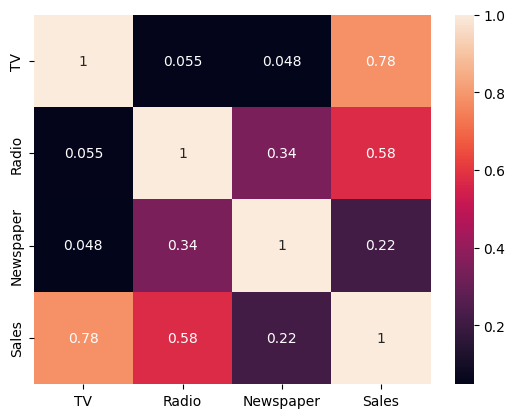

In [59]:
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values
# From the heatmap, Newspaper has very less correlation with sales, since dataset is small we are not dropping Newspaper

<AxesSubplot:>

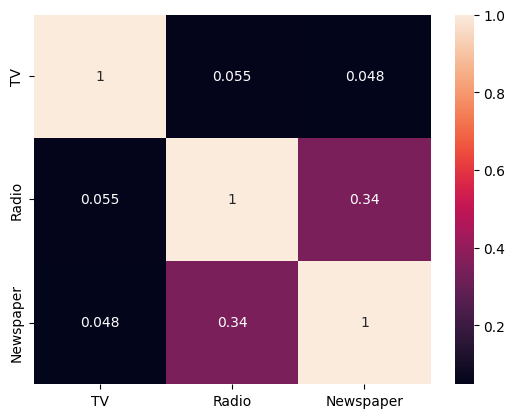

In [60]:
# Check for multicollinearity --> there should not be any high correlation among input variables
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True) # the heatmap below satisfies multicollinearity

#### Heat map analysis
#### Linearity
* We include columns which have high correlation with target
* we drop columns which have less correlation with target

#### Little or no multicollinearity
* We include columns which have less correlation among each other
* We drop one of the column if two input variables have high correlation

### Split data into x and y

In [13]:
x=data.drop("Sales",axis=1)
y=data['Sales']

### Split data for training and testing
* Use either 70:30 rule (70% training, 30% testing) or 80:20 rule (80% training, 20% testing)

#### sklearn
It is one of the scientific libraries which includes all packages related to Machine Learning, Data Cleaning, and Feature Engineering

In [14]:
from sklearn.model_selection import train_test_split # requires scikit-learn installed --> pip install scikit-learn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [15]:
x_train.shape

(140, 3)

In [23]:
x_test.shape

(60, 3)

In [24]:
# print x
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [73]:
# print y
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Model Building

In [25]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize your model --> make your model ready
model=LinearRegression()

# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [36]:
# Make predictions/ test model
# Since we've three variables, our model is multilinear regression --> y = m1x1 + m2x2 + m3x3 + c
y_pred=model.predict(x_test)
y_pred # You can compare the predicted values against the y values

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724,
       20.9083371 , 10.09857022, 12.38326275, 12.01767713, 16.939182  ,
       22.8039863 , 15.18438755,  8.45988902, 14.86958246, 18.5360064 ,
       18.5391287 , 18.67614759, 14.5131948 ,  9.74192603, 20.57441729,
       14.89243548, 17.70102466, 23.04193509,  7.718106  , 21.42075683,
       19.62792915, 13.79733409, 11.63827129, 18.42655599, 12.19463761,
       11.40777433,  9.96083851, 13.49436555, 15.18912412, 18.09830593,
        6.92815403, 14.21050378, 14.27217178, 14.10451207, 10.77723418,
       14.82936609, 11.96507878, 10.69651541, 10.40851022,  6.21159776,
       16.82112487, 16.4659736 , 12.07626636, 10.75281419, 20.84690688,
       15.09266208, 15.39499668, 13.27964587, 14.1081843 , 12.38574411,
        9.03289588, 20.48246311,  9.3517132 ,  5.36311192,  8.24848891])

In [26]:
# compare predictions with y_test values
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

In [40]:
# Slopes/coefficients of x
model.coef_

array([0.04533392, 0.17715767, 0.00553852])

In [41]:
# Intercept
model.intercept_

3.09064436412511

In [ ]:
# Evaluate model using different error functions

In [ ]:
# Some Tasks
What will be the total sales if my investment on TV = 100, Radio = 50, Newspaper = 10
What will be the total sales if my investment on TV = 10, Radio = 500, Newspaper = 10
What will be the total sales if my investment on TV = 5, Radio = 10, Newspaper = 100
What will be the total sales if my investment on TV = 1000, Radio = 300, Newspaper = 50

In [42]:
# To get the order of variables, print x
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [43]:
model.predict([[100,50,10]])

array([16.5373046])

In [44]:
model.predict([[10,500,10]])

array([92.17820211])

In [45]:
model.predict([[5,10,100]])

array([5.64274266])

In [46]:
model.predict([[1000,300,50]])

array([101.84878734])

## Evaluate Model

In [ ]:
# Loss functions to know the difference btwn actual and predicted values.
# Difference Error/Loss functions in Regression algorithm are
* MSE(Mean Squared Error)
* MAE(Mean Absolute Error)
* RMSE(Root Mean Squared Error)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

2.2237746679115578

In [48]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.2111525124980485

In [51]:
# RMSE
# if RMSE is near to 1, we say it's good model
# if RMSE is near to 0, we say bad model
RMSE=np.sqrt(MSE)
RMSE

1.4912326002041256

In [52]:
# r2_score
r2_score(y_test,y_pred)

0.9127220729596172

In [53]:
# 91% better model to make predictions
# Model has learnt 91% of the information

### Adjusted R2 score
* If you dont drop columns that are less relevant, the R2 value increases drastically, which will give wrong predictions
* Adjusted R2 should be less than R2 to make sure the model doesnt give wrong oredictions\

#### Disadvantages of R2
* R2 increases as the number of independent variables increases which has very less relationship with target variables
* To overcome this, we use adjusted R2

Adjusted R2 will measure the performance of the model by ignoring columns which has very less relationship with target.

Adjusted R2 = 1 - (1-R2)*(N-1)/N-P-1: Where N --> No. of observations & P --> No. of independent variables

In [1]:
adj_r2=1-(1-0.9127220729596172)*(60-1)/(60-3-1)
adj_r2

0.9080464697253109

In [2]:
# Adjusted R2 score (adj_r2) < R2 (r2_score), therefore model doesn't give wrong values

In [18]:
# y_test.shape gives the value of N
y_test.shape

(60,)

## Conclusion
* Average sales made by the company is $14.02m
* Average amount spent on TV is more compared to Radio and Newspaper
* Maximum amount spent on TV advertising is more compared to Radio and Newspaper


#### Based on the problem:

* Sales is target
* TV, Radio and Newspaper are input variables
* Linear Regression is the suitable ML method to predict Sales


* This data basically tells us about the total sales made by the company by investing certain amount on TV, Radio and Newspaper Advertising.
* TV is the best field for advertising the product so that the company can yield more sales.
* Investing in Radio will also yield some good sales but investing in Newspaper is not really a good idea.
* There is no relationship btwn Newspaper and Sales
* Investing more or less on Newspaper advertising will yield very less Sales

#### Model Evaluation:

* Based on r2_Score, the model performs 91 percent better to make predictions
* The model has learnt 91 percent of the information
* Adjusted R2 score (adj_r2) < R2 (r2_score), therefore model doesn't give wrong values

## 📬Connect with Me📬

[Twitter](https://twitter.com/Eng_Normie)

[Linkedin](https://www.linkedin.com/in/normangwangwava/)

[Blog](https://engnormie.wordpress.com/)

[Tableau](https://tableau.com/engnormie)

[Novpro](https://novpro.com/engnormie)

[Medium](https://medium.com/engnormie)